# **API using Flask**
**This notebook contains code to run a Flask API on colab itself using Flask-Ngrok**

## **Installing Required Packages**

In [1]:
!pip install flask-ngrok
!pip install Flask-Cors
!pip install pyngrok==4.1.1
!pip install wolframalpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15979 sha256=70a2300cdf59a3a7e8a2f7965fafc7fa118ca3d0cb4e0116373e1465d3784f74
  Stored in directory: /root/.cache/pip/wheels/89/2d/c2/abe6bcfde6bce368c00ecd73310c11edb672c3eda09a090cfa
Successfully built pyngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Importing Required Modules**

In [2]:
import tensorflow as tf
import numpy as np
import cv2
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
import json
from base64 import b64decode
from flask_cors import CORS, cross_origin
from PIL import Image
import wolframalpha

## **Loading Model**
**Loading our pre-trained model and defining a function to detect group of images in our usecase.**

In [4]:
model = tf.keras.models.load_model('model.h5')

In [5]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec', 'div', 'eq', 'mul', 'sub', 'x', 'y', 'z']

In [6]:
def detect(count):
  result = []
  imgs = []
  for i in range(count):
    img = cv2.imread(str(i) + '.png', 0)
    img = cv2.resize(img, (100, 100)) #resize the image to the input shape of our model
    img = img / 255.0 #normalize the pixel values between 0 and 1
    imgs.append(img)
  imgs = np.array(imgs)
  predictions = model.predict(imgs)
  for pred in predictions:
    result.append(class_names[np.argmax(pred)])
  return result

**Setting authtoken for Flask-Ngrok**

In [8]:
!ngrok authtoken 2MBiIm2SuATyVElShfhVXcOUljW_2TeXUc22jzRD4kJnoR24S

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


**Setting up for WolframAlpha API**

In [ ]:
app_id = "VTKLPY-R5EQ5V6VAW"
client = wolframalpha.Client(app_id) 

In [9]:
def translate(res):
  translated = ''
  code = {'add': '+', 'dec': '.', 'div': '/', 'eq': '=', 'mul': '*', 'sub': '-'}
  for char in res:
    if char in code:
      translated += code[char]
    else:
      translated += char
  return translated
    

## **API USING FLASK**

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://6665-34-141-213-18.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [31/Mar/2023 14:02:43] "OPTIONS /solve HTTP/1.1" 200 -


{'count': 5, 'images': ['', '', '', '', '']}
1/1 [==============================] - 0s 22ms/step
['3', 'x', 'eq', '1', '5'] 3x=15

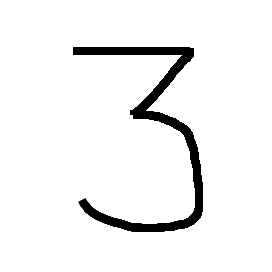
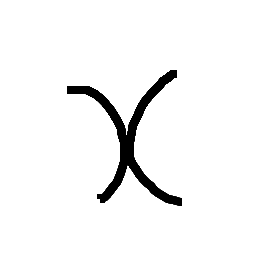
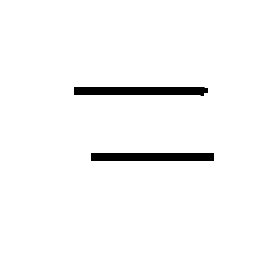
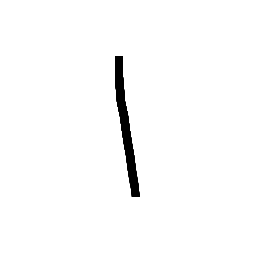
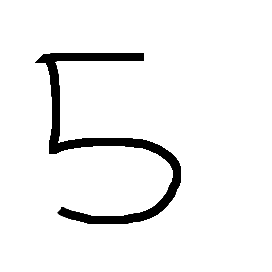

INFO:werkzeug:127.0.0.1 - - [31/Mar/2023 14:02:45] "POST /solve HTTP/1.1" 200 -


{'@success': True, '@error': 'false', '@xml:space': 'preserve', '@numpods': '5', '@datatypes': '', '@timedout': '', '@timedoutpods': '', '@timing': '0.609', '@parsetiming': '0.176', '@parsetimedout': 'false', '@recalculate': '', '@id': 'MSP102451h9520f43eg6ad6c00005bf4i8ge9g7b063f', '@host': 'https://www6b3.wolframalpha.com', '@server': '10', '@related': 'https://www6b3.wolframalpha.com/api/v1/relatedQueries.jsp?id=MSPa102461h9520f43eg6ad6c00002bgdaed4490451973142019838491228908', '@version': '2.6', '@inputstring': '3x=15', 'pod': [{'@title': 'Input', '@scanner': 'Identity', '@id': 'Input', '@position': 100.0, '@error': 'false', '@numsubpods': 1, 'subpod': {'@title': '', 'img': {'@src': 'https://www6b3.wolframalpha.com/Calculate/MSP/MSP102471h9520f43eg6ad6c0000281hf7a49d793973?MSPStoreType=image/gif&s=10', '@alt': '3 x = 15', '@title': '3 x = 15', '@width': 56, '@height': 19, '@type': 'Default', '@themes': '1,2,3,4,5,6,7,8,9,10,11,12', '@colorinvertable': 'true', '@contenttype': 'image

INFO:werkzeug:127.0.0.1 - - [31/Mar/2023 14:02:57] "OPTIONS /solve HTTP/1.1" 200 -


{'count': 5, 'images': ['', '', '', '', '']}
1/1 [==============================] - 0s 19ms/step
['3', 'x', 'eq', '1', '2'] 3x=12

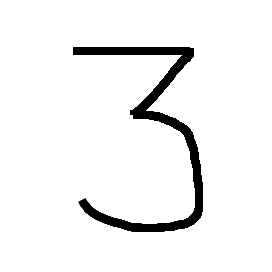
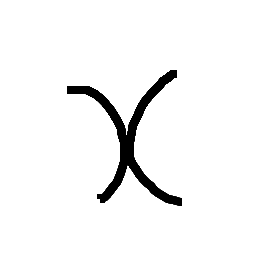
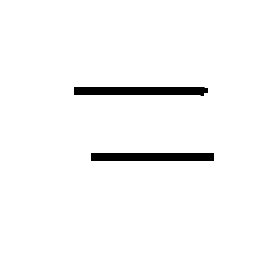
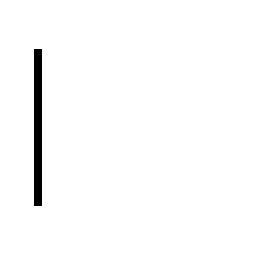
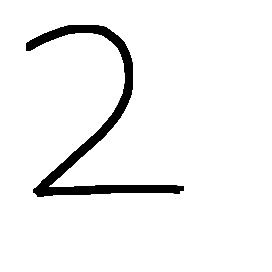

INFO:werkzeug:127.0.0.1 - - [31/Mar/2023 14:02:59] "POST /solve HTTP/1.1" 200 -


{'@success': True, '@error': 'false', '@xml:space': 'preserve', '@numpods': '5', '@datatypes': '', '@timedout': '', '@timedoutpods': '', '@timing': '0.625', '@parsetiming': '0.187', '@parsetimedout': 'false', '@recalculate': '', '@id': 'MSP1428148b05de60f59bag00004c381753g3g530hc', '@host': 'https://www6b3.wolframalpha.com', '@server': '11', '@related': 'https://www6b3.wolframalpha.com/api/v1/relatedQueries.jsp?id=MSPa1429148b05de60f59bag0000397gcd5g2i9ei3585481992349747128482', '@version': '2.6', '@inputstring': '3x=12', 'pod': [{'@title': 'Input', '@scanner': 'Identity', '@id': 'Input', '@position': 100.0, '@error': 'false', '@numsubpods': 1, 'subpod': {'@title': '', 'img': {'@src': 'https://www6b3.wolframalpha.com/Calculate/MSP/MSP1430148b05de60f59bag000062557546eb28e6e5?MSPStoreType=image/gif&s=11', '@alt': '3 x = 12', '@title': '3 x = 12', '@width': 56, '@height': 19, '@type': 'Default', '@themes': '1,2,3,4,5,6,7,8,9,10,11,12', '@colorinvertable': 'true', '@contenttype': 'image/gi

In [12]:

app = Flask(__name__)
cors = CORS(app)
app.config['CORS_HEADERS'] = 'Content-Type'
run_with_ngrok(app)


@app.route('/solve', methods=['POST', 'GET'])
@cross_origin()
def login():
    if request.method == 'POST':

        
        data = json.loads(str(request.data)[2:-1])
        print(data)
        count = data['count']
        images = data['images']
        for i in range(count):
            image = images[i].replace('data:image/png;base64,', '')
            text = image.encode('ascii')
            f = b64decode(text)
            with open(str(i) + '.png', 'wb') as file:
                file.write(f)
        detected = detect(count)
        translated = translate(detected)
        print(detected, translated)
        res = client.query(translated)
        print(res)
        answer = next(res.results).text

        return jsonify({'answer': answer, 'detected': translated})
    else:
        return jsonify({'error': "only post requests allowed"})


app.run()


### **NOTE**
**If we're using this way to run our app, we'll have to add the url generated by Flask-ngrok in our api-url.js file. For example, here the url is http://6665-34-141-213-18.ngrok.io. This is because, Flask-ngrok generates a temporary url every time.**